In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [5]:
housing = pd.read_csv("./housing.csv")
#reading a local data
#housing.head()

#here median_house_value is the target value which I want to predict
#using my model
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#getting the number of unique values in input features that are strings

string_features = ["ocean_proximity"]
for i in string_features:
    print(housing[i].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [8]:
#basic 5-point summary of the numerical features
print(housing.describe())
print(housing.shape)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

from above code, it can be said that there are some data rows in which total_bedrooms data row
is missing, hence we need to do data imputation there

I can try many approaches, but I will do two
1. Removing the rows with missing features
2. Replacing the missing value with the average of the value of that feature in
    k-nearest neighbors


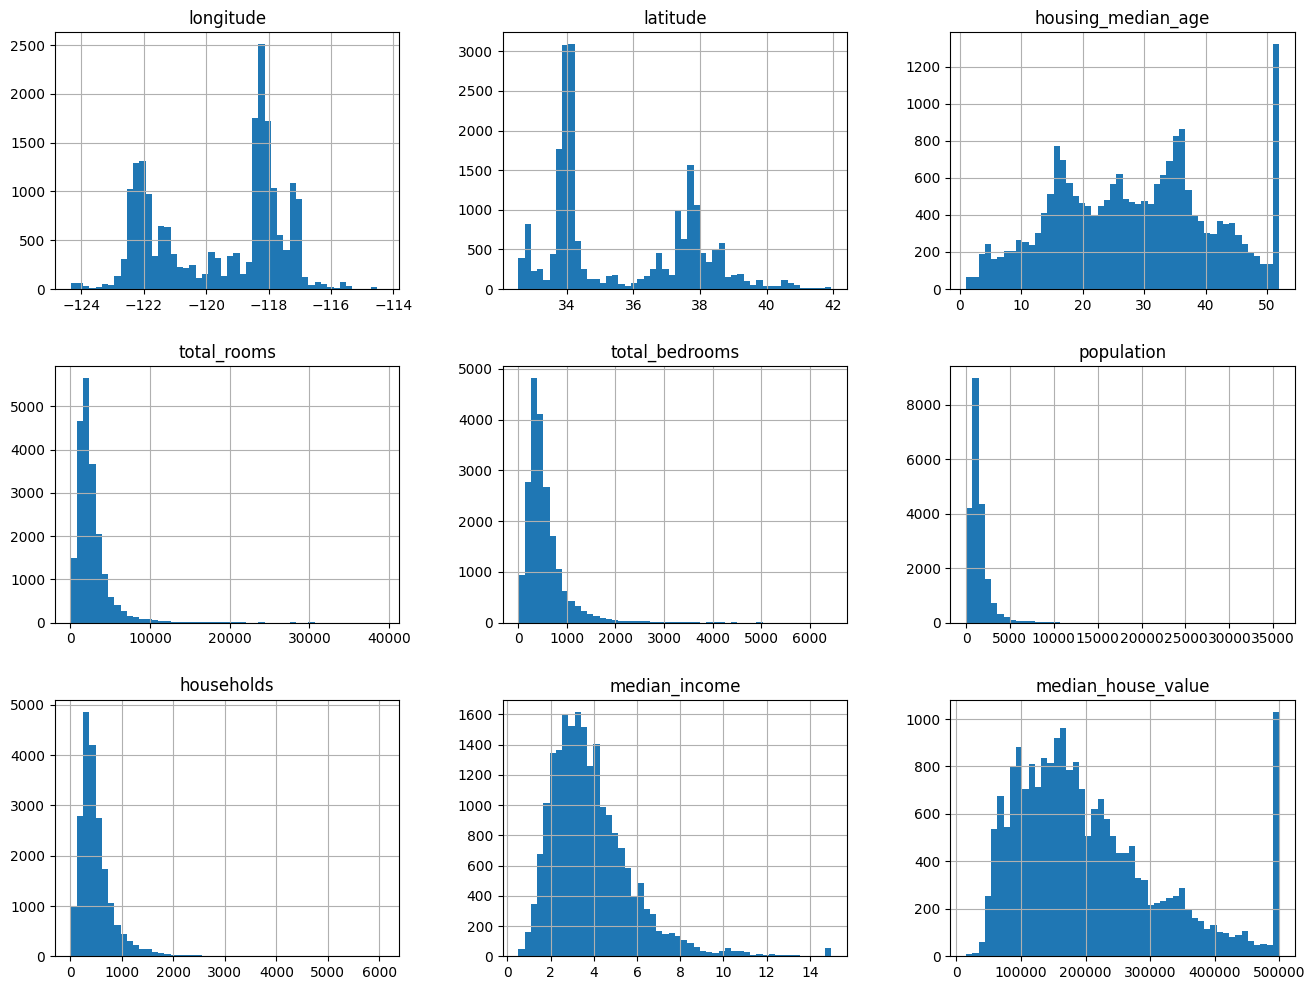

In [19]:
#plotting histogram for each numerical feature

housing.hist(bins=50, figsize=(16,12))
plt.show()

In [ ]:
#selecting a random test dataset from the original dataset
def shuffle_and_split_data(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc(test_indices)

#from above=> in every runtime, a new test set in created, our model we train 
#on the whole dataset, hence problem

Solutions
1. Make train and test dataset for the first run, and use them for 
subsequent runs
2. Use PRNGs with a fixed seed inorder to get the same test dataset everytime

These random sampling will only work for datasets with large samples.

In order to make the sample a good representative for the population
we need to do *Stratified Sampling*


In [ ]:
X = ["longitude	latitude",	"housing_median_age","total_rooms",	"total_bedrooms","population","households","median_income",	"ocean_proximity"]
y = ["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(housing, test_size=0.2, random_state=42)

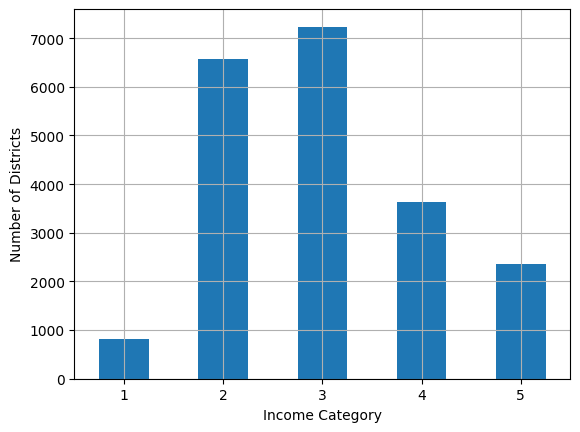

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

In [34]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins = [0,1.5,3.0,4.5,6.0,np.inf],
                        labels = [1,2,3,4,5])

#doing some plotting for income_cat
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.show()
#since we are using binning here, hence our partition reflects the
#normal distribution of the data (this is important, make sure you understand this)

print(housing["income_cat"])
housing['income_cat'].value_counts().sort_index()

Stratified sampling ensures that the distribution of a specific attribute (in this case, the "income_cat" feature) remains consistent across different splits. This can be particularly useful when dealing with imbalanced datasets or when certain attributes are critical for model performance.

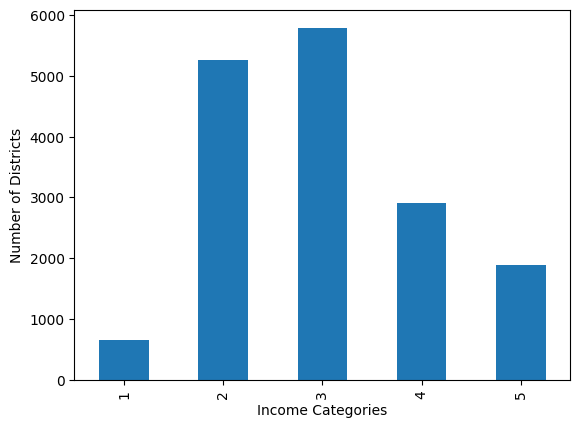

<Axes: xlabel='income_cat'>

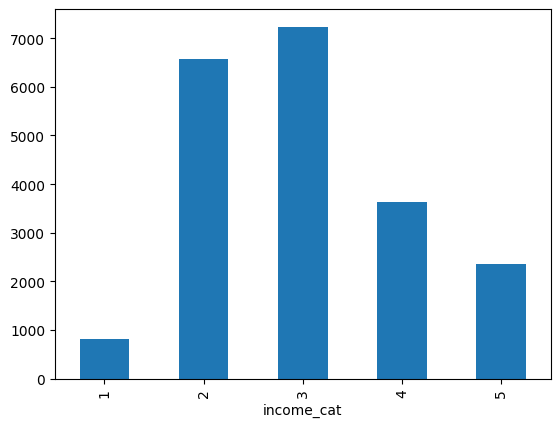

In [41]:
#let's try doing some stratified partition with
#having 10 sample of 20% size each on
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]
#getting only the first split

strat_train_set["income_cat"].value_counts().sort_index().plot.bar()
plt.xlabel("Income Categories")
plt.ylabel("Number of Districts")
plt.show()

#comparing the distribution of original income categories distribution
housing["income_cat"].value_counts().sort_index().plot.bar()

In [43]:
#removing the income_cat column from my stratified sample
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_19368\1402176994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis = 1, inplace = True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_19368\1402176994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis = 1, inplace = True)


# EDA to some insights on the data 

In [45]:
#from now on we would only work on strat_train_set, 
# and ignore strat_test_set

exploration_copy = strat_train_set.copy()
exploration_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN
